In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing the data

In [2]:
raw_data = pd.read_csv('Index2018.csv')
raw_data.head()

# market indexes

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [3]:
df = raw_data.copy()

## Examining the data

In [4]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [5]:
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Plotting the data

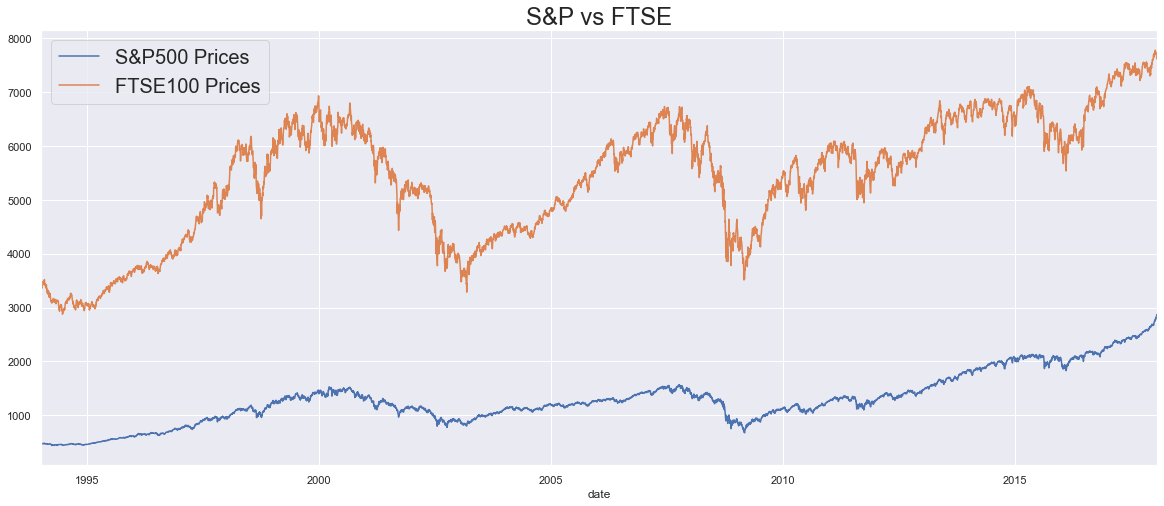

In [45]:
df.spx.plot(label = "S&P500 Prices", figsize = (20, 8))
df.ftse.plot(label = "FTSE100 Prices")
plt.title('S&P vs FTSE', size = 24)
plt.legend(fontsize = 20)
plt.show()

## The QQ(Quantile-Quantile) plot

In [7]:
import scipy.stats
import pylab

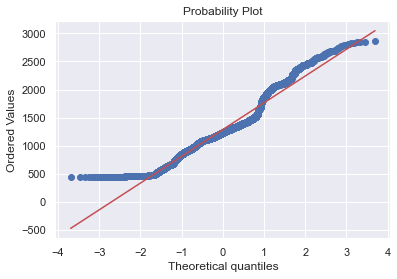

In [8]:
scipy.stats.probplot(df.spx, plot = pylab)
pylab.show()

# as we can see our data is not normally distrubited
# (see a huge tail in the bottom left)

## Transform raw data into Time-Series Data

### Set new index 'date'

In [9]:
df.date = pd.to_datetime(df.date, dayfirst = True)
df

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.900000,2224.95,3445.980000,18124.01
1,1994-01-10,475.270000,2225.00,3440.580000,18443.44
2,1994-01-11,474.130000,2228.10,3413.770000,18485.25
3,1994-01-12,474.170000,2182.06,3372.020000,18793.88
4,1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,2018-01-23,2839.130362,13559.60,7731.827774,24124.15
6265,2018-01-24,2837.544008,13414.74,7643.428966,23940.78
6266,2018-01-25,2839.253031,13298.36,7615.839954,23669.49
6267,2018-01-26,2872.867839,13340.17,7665.541292,23631.88


In [10]:
df.describe(datetime_is_numeric = True)

,date,spx,dax,ftse,nikkei
count,6269,6269.000000,6269.000000,6269.000000,6269.000000
mean,2006-01-14 19:36:59.492742144,1288.127542,6080.063363,5422.713545,14597.055700
min,1994-01-07 00:00:00,438.920000,1911.700000,2876.600000,7054.980000
25%,2000-01-11 00:00:00,990.671905,4069.350000,4486.100000,10709.290000
50%,2006-01-12 00:00:00,1233.420000,5773.340000,5662.430000,15028.170000
75%,2012-01-19 00:00:00,1459.987747,7443.070000,6304.250000,17860.470000
max,2018-01-29 00:00:00,2872.867839,13559.600000,7778.637689,24124.150000
std,NaN,487.586473,2754.361032,1145.572428,4043.122953


In [11]:
# setting new index
df.set_index('date', inplace = True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Set the desired frequency

In [12]:
# setting the desired frequency
df = df.asfreq('d') # 'd' - daily
df.head()

# 8-9 Jan 1994 are weekends!

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [13]:
df = df.asfreq('b') # 'b' - business days
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Missing values

In [14]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [15]:
df.fillna(method = 'ffill', inplace = True)
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Split the data

In [16]:
# never suffle time-series data!
# train data = from beginning up to some cut off point
# test data = from some cut off point until the end

# 80% - train data, 20% - test data
split_point = int(len(df) * 0.8)
train_df = df.iloc[:split_point, :]
test_df = df.iloc[split_point:, :]

## White Noise

In [22]:
np.random.seed(1)
df['wn'] = np.random.normal(loc = df.spx.mean(), scale = df.spx.std(), size = len(df))
df.head()

,spx,dax,ftse,nikkei,wn
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,2081.109012
1994-01-10,475.27,2225.00,3440.58,18443.44,990.186041
1994-01-11,474.13,2228.10,3413.77,18485.25,1030.964340
1994-01-12,474.17,2182.06,3372.02,18793.88,765.175266
1994-01-13,472.47,2142.37,3360.01,18577.26,1710.847418


In [23]:
df[['spx', 'wn']].describe()

,spx,wn
count,6277.000000,6277.000000
mean,1288.642547,1294.173636
std,487.868210,487.571249
min,438.920000,-302.107902
25%,992.715221,965.726563
50%,1233.761241,1294.377685
75%,1460.250000,1617.296606
max,2872.867839,3219.918961


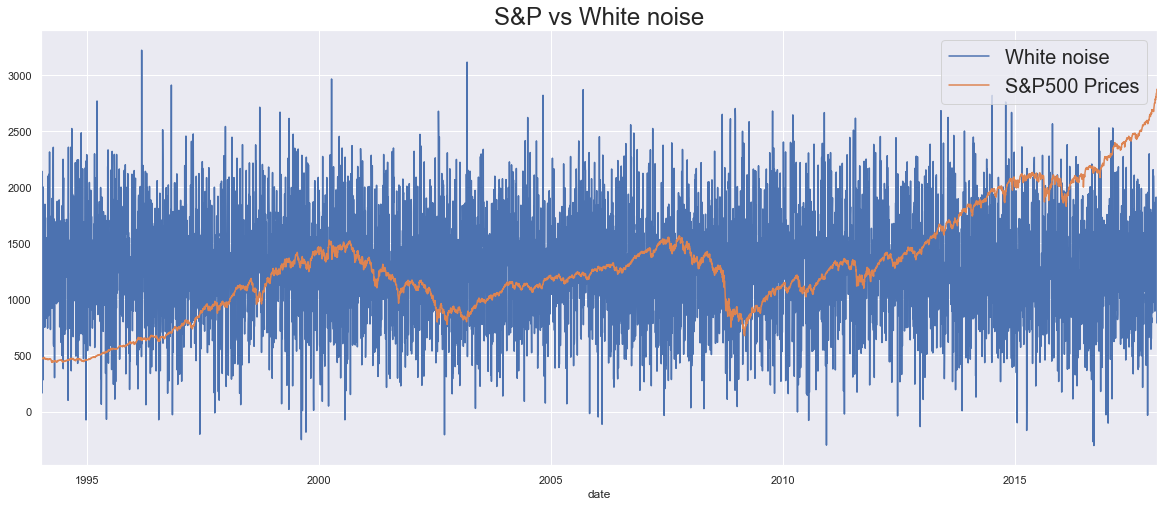

In [42]:
df.wn.plot(label = "White noise", figsize = (20, 8))
df.spx.plot(label = "S&P500 Prices")
plt.title('S&P vs White noise', size = 24)
plt.legend(fontsize = 20)
plt.show()

## Random walk

In [32]:
rw = pd.read_csv('RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index('date', inplace = True)
rw = rw.asfreq('b')
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [34]:
df['rw'] = rw.price
df.head()

,spx,dax,ftse,nikkei,wn,rw
date,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,2081.109012,1122.139662
1994-01-10,475.27,2225.00,3440.58,18443.44,990.186041,1080.347860
1994-01-11,474.13,2228.10,3413.77,18485.25,1030.964340,1082.095245
1994-01-12,474.17,2182.06,3372.02,18793.88,765.175266,1083.639265
1994-01-13,472.47,2142.37,3360.01,18577.26,1710.847418,1067.146255


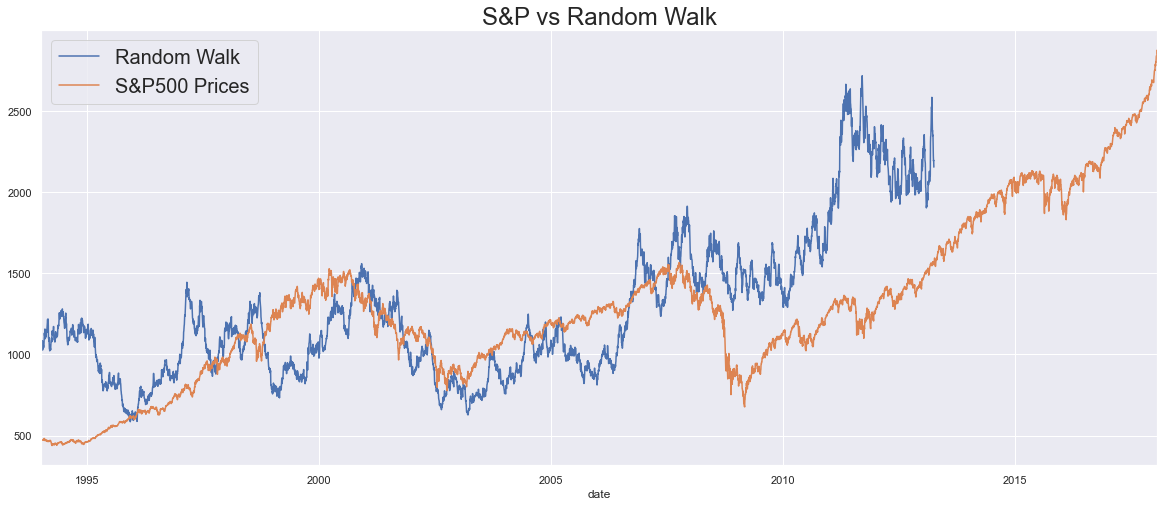

In [43]:
df.rw.plot(label = "Random Walk", figsize = (20, 8))
df.spx.plot(label = "S&P500 Prices")
plt.title('S&P vs Random Walk', size = 24)
plt.legend(fontsize = 20)
plt.show()